# LSTM Encoder

RNN model to encode an abstract and predict the gender of the study

In [1]:
%store -r abstracts_w2v_embeddings abstracts_targets_collapsed

### Training Data

In [2]:
from sklearn.cross_validation import train_test_split

X_idxs = list(abstracts_targets_collapsed.abstracts_idxed)
ys = abstracts_targets_collapsed.phase_2
X_train, X_val, ys_train, ys_val = train_test_split(X_idxs, ys)
num_classes = len(ys.unique())

### Train

In [3]:
from rnn.train import RNNTrainer

trainer = RNNTrainer(abstracts_w2v_embeddings, num_classes=num_classes, cell_type='vanilla')

N = 40

trainer.train(X_train[:N], ys_train[:N], X_train[:N], ys_train[:N], reg=0.001, num_epochs=50, val_every=N)

Building theano graph...
Done!
Loss, Accuracy = (16.3373093517, 0.5)
Loss, Accuracy = (74.7088201706, 0.5)
Loss, Accuracy = (85.5637974121, 0.475)
Loss, Accuracy = (76.7360463496, 0.5)
Loss, Accuracy = (75.3734939884, 0.425)
Loss, Accuracy = (82.11871958, 0.525)
Loss, Accuracy = (70.4041580557, 0.525)
Loss, Accuracy = (82.2544608321, 0.45)
Loss, Accuracy = (71.7552852528, 0.525)
Loss, Accuracy = (76.4427930658, 0.525)
Loss, Accuracy = (75.5998827449, 0.45)
Loss, Accuracy = (74.9981828788, 0.525)
Loss, Accuracy = (73.3379714014, 0.525)
Loss, Accuracy = (75.9167795342, 0.45)
Loss, Accuracy = (68.0284614794, 0.475)
Loss, Accuracy = (71.6942638672, 0.525)
Loss, Accuracy = (70.0454104731, 0.45)
Loss, Accuracy = (68.7188590458, 0.525)
Loss, Accuracy = (70.0070299864, 0.525)
Loss, Accuracy = (61.8280119382, 0.525)
Loss, Accuracy = (70.0159460802, 0.45)
Loss, Accuracy = (68.2657359968, 0.525)
Loss, Accuracy = (62.6730651289, 0.45)
Loss, Accuracy = (69.892895598, 0.525)
Loss, Accuracy = (61.582

/home/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/theano/scan_module/scan.py:1017: Warning: In the strict mode, all neccessary shared variables must be passed as a part of non_sequences
  'must be passed as a part of non_sequences', Warning)


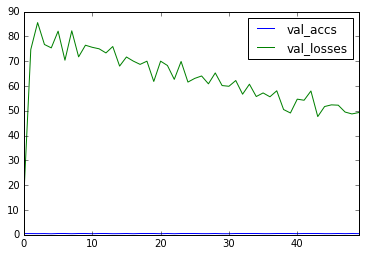

In [4]:
pd.DataFrame({'val_losses': trainer.val_losses, 'val_accs': trainer.val_accuracies}).plot()

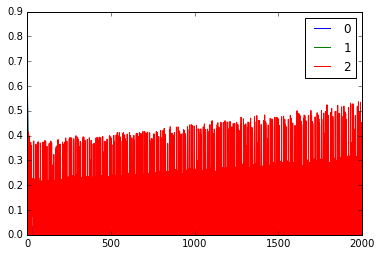

In [5]:
pd.DataFrame(trainer.grad_magnitudes).plot()